## Расчетно-графическая работа по функциональному анализу

### Задание №1

$$
T(x)(t) = 
\begin{cases} 
\frac{1}{7} x(3t) + 7.5, & 0 \leq t \leq \frac{1}{3} \\ 
f(t), & \frac{1}{3} < t < \frac{2}{3} \\
\frac{1}{7} x(3t - 2) + 7.5, & \frac{2}{3} \leq t \leq 1 
\end{cases}
$$

где $f(t)$ - уравнение ломаной, проходящей через точки $(\frac{4}{9}, 1)$ и $(\frac{5}{9}, -1)$, такой, что $T(x)$ - непрерывная функция

#### Уравнение ломаной $f(t)$
Ломаная проходит через две точки:
1. $(\frac{4}{9}, 1)$
2. $(\frac{5}{9}, -1)$
Её уравнение можно найти как линейную интерполяцию:
$$f(t) = at + b$$
где коэффиценты a и b находятся из системы:
$$
\begin{cases}
1 = \frac{4}{9}a + b \\
-1 = \frac{5}{9}a + b
\end{cases}
$$
Вычитаем второе уравнение из первого:
$$2 = a(\frac{4}{9} - \frac{5}{9}) = -\frac{a}{9} ⟹ a = -18$$
Подставляем $a$ в первое уравнение:
$$1 = -18 \cdot \frac{4}{9} + b ⟹ 1 = -8 + b ⟹ b = 9$$
Таким образом:
$$f(t) = -18t + 9$$

##### Итерационный процесс
- Начальное приближение: $x_{0}(t)$ ($x_{0}(t) = 0$ или $x_{0}(t) = t$)
- Вычисляем $x_{n+1} = T(x_{n})$ до достижения заданной точноcти $||x_{n+1} - x_{n}|| < \epsilon$
##### Критерий остановки:
$$||x_{n+1} - x_{n}|| = max_{t \in [0,1]}|x_{n+1}(t) - x_{n}(t)| < \epsilon$$

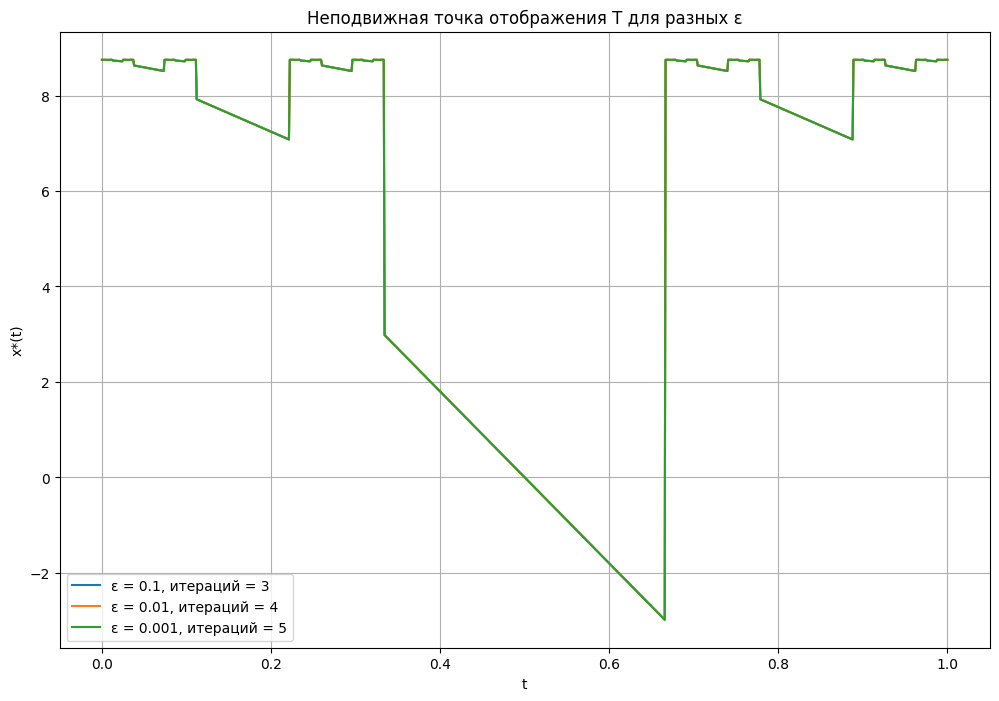

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def T(x, t):
    if isinstance(t, (np.ndarray, list)):
        return np.array([T(x, t_i) for t_i in t])
    if t <= 1 / 3:
        return (1 / 7) * x(3 * t) + 7.5
    elif t < 2/3:
        return -18 * t + 9
    else:
        return (1 / 7) * x(3 * t - 2) + 7.5
    
def fixed_point(x0, epsilon, max_iterations=100):
    t_values = np.linspace(0, 1, 1000)
    x = x0(t_values)

    for n in range(max_iterations):
        x_new = T(lambda t: np.interp(t, t_values, x), t_values)
        error = np.max(np.abs(x_new - x))
        if error < epsilon:
            return lambda t: np.interp(t, t_values, x_new), n
        x = x_new # обновляем приближение
    return lambda t: np.interp(t, t_values, x), max_iterations

# Начальное приближение
x0_1 = lambda t: np.zeros_like(t) if isinstance(t, np.ndarray) else 0 # Нулевая функция
x0_2 = lambda t: t                                                    # Линейная функция

# Вычисление неподвижной точки с разной точностью
epsilon_list = [1e-1, 1e-2, 1e-3]
results = {}
for eps in epsilon_list:
    x_star, iterations = fixed_point(x0_1, epsilon=eps)
    results[eps] = (x_star, iterations)

t_plot = np.linspace(0, 1, 1000)
plt.figure(figsize=(12, 8))
for eps, (x, iterations) in results.items():
    plt.plot(t_plot, x(t_plot), label=f'ε = {eps}, итераций = {iterations}')
plt.title('Неподвижная точка отображения T для разных ε')
plt.xlabel('t')
plt.ylabel('x*(t)')
plt.legend()
plt.grid()
plt.show()
